In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:\\UMAR DATA\\Data Sciences\\machine learning\\Projects\\Forage\\customer_booking.csv",encoding='latin1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
df[['sales_channel', 'trip_type', 'booking_origin', 'route']].describe()

,sales_channel,trip_type,booking_origin,route
count,50000,50000,50000,50000
unique,2,3,104,799
top,Internet,RoundTrip,Australia,AKLKUL
freq,44382,49497,17872,2680


In [10]:
df_category=['wants_extra_baggage', 'wants_preferred_seat', 'flight_day', 'wants_in_flight_meals', 
                  'booking_complete']
for category in df_category:
    df[category]=df[category].astype('category')
df.describe(include='category')

,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
count,50000,50000,50000,50000,50000
unique,7,2,2,2,2
top,1,1,0,0,0
freq,8102,33439,35152,28643,42522


# Feature Engineering 

In [11]:
df['Origin_Country']=df['route'].str[:3]
df['Destination_Country']=df['route'].str[3:]

In [12]:
Timing=[0,12,24]
labels=['AM','PM']
df['Day Timing']=pd.cut(df['flight_hour'],bins=Timing,labels=labels,right=False)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Origin_Country,Destination_Country,Day Timing
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL,AM
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL,AM
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,AKL,DEL,PM
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL,AM
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,AKL,DEL,PM


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_2488\1326082283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.countplot(data=df,x='booking_complete',palette='Set2')


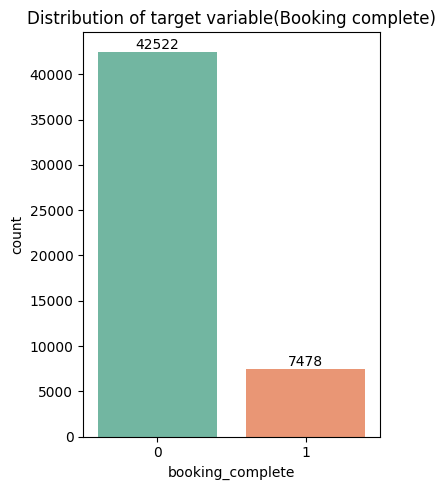

In [14]:
plt.figure(figsize=(4,5))
plot=sns.countplot(data=df,x='booking_complete',palette='Set2')
plt.title('Distribution of target variable(Booking complete)')
for p in plot.patches:
    count=int(p.get_height())
    plot.annotate(str(count),(p.get_x()+p.get_width()/2,p.get_height()+1),ha='center',va='bottom')
plt.tight_layout()

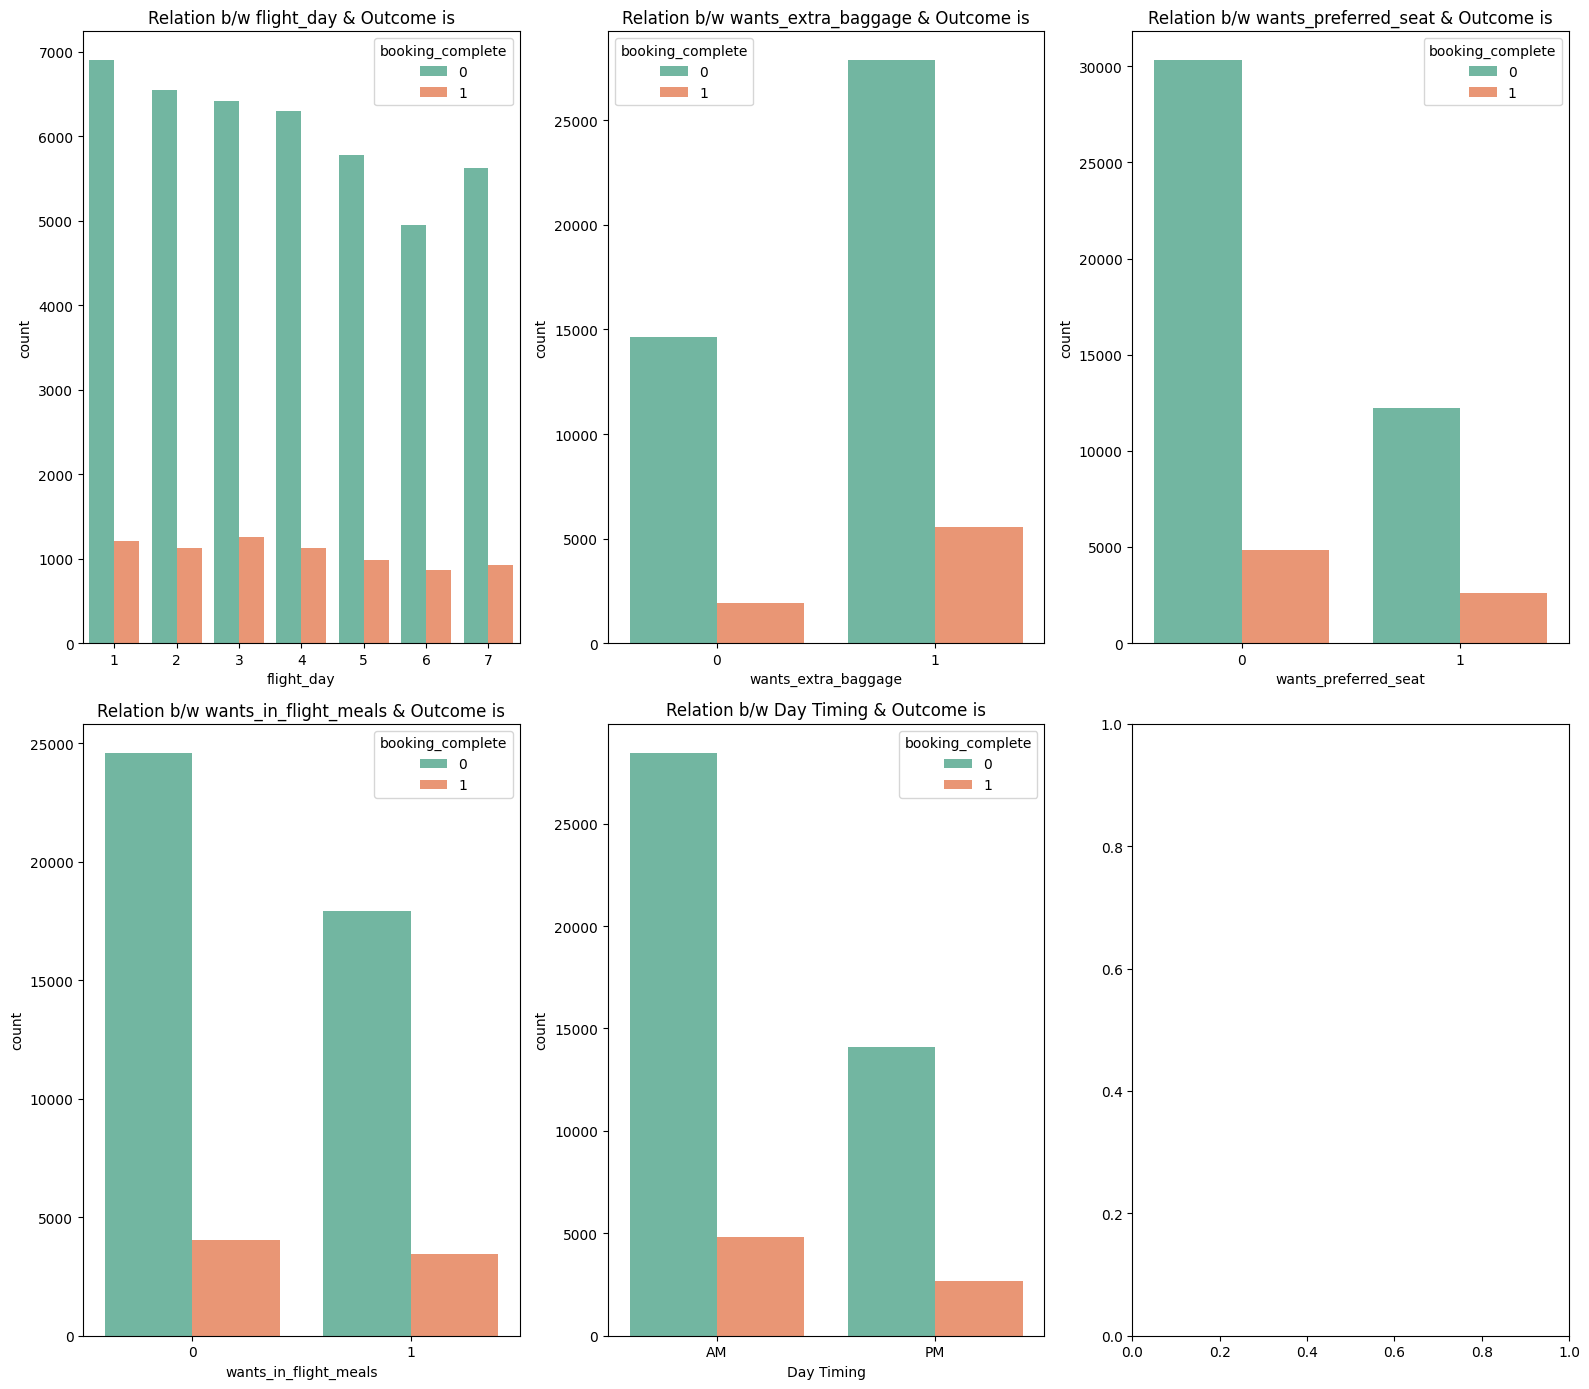

In [54]:
categorical_features=['flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals',
                     'Day Timing']
fig,axis=plt.subplots(2,3,figsize=(16,14))
axis=axis.flatten()
for i,col in enumerate(categorical_features):
    ax=axis[i]
    plot=sns.countplot(data=df,x=col,hue='booking_complete',palette='Set2',ax=ax)
    ax.set_title(f'Relation b/w {col} & Outcome is')
plt.tight_layout()
plt.show()

In [59]:
categorical_features=['flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals',
                     'Day Timing']
for feature in categorical_features:
    output=df.groupby('booking_complete')[feature].value_counts(normalize=True)
    print(f'Value Count in feature {feature} is:\n {round(output*100,ndigits=2)}%')

Value Count in feature flight_day is:
 booking_complete  flight_day
0                 1             16.22
                  2             15.39
                  3             15.10
                  4             14.82
                  5             13.59
                  7             13.23
                  6             11.64
1                 3             16.74
                  1             16.10
                  2             15.10
                  4             15.00
                  5             13.15
                  7             12.40
                  6             11.51
Name: proportion, dtype: float64%
Value Count in feature wants_extra_baggage is:
 booking_complete  wants_extra_baggage
0                 1                      65.53
                  0                      34.47
1                 1                      74.53
                  0                      25.47
Name: proportion, dtype: float64%
Value Count in feature wants_preferred_seat is:
 booking_c

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15380\3115519346.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  output=df.groupby('booking_complete')[feature].value_counts(normalize=True)
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15380\3115519346.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  output=df.groupby('booking_complete')[feature].value_counts(normalize=True)
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15380\3115519346.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

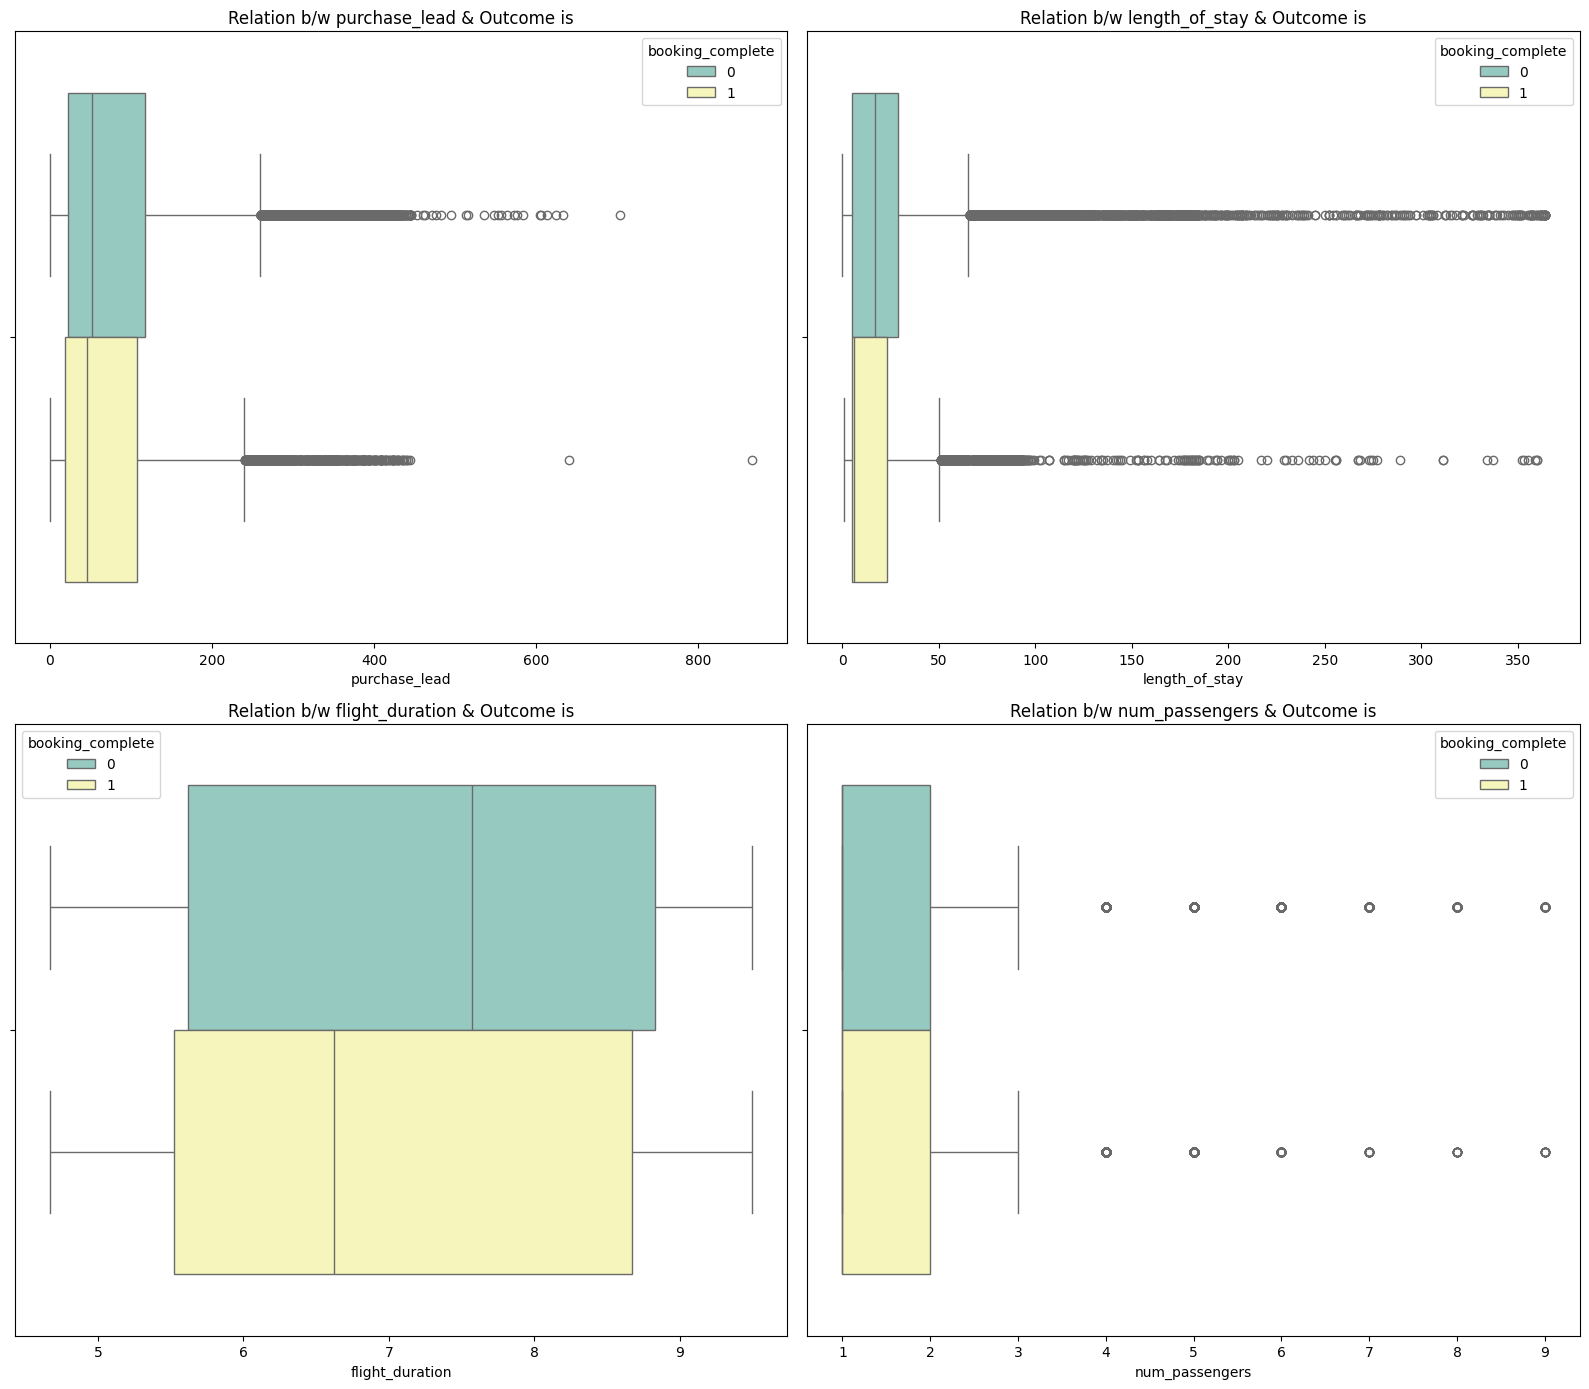

In [69]:
numerical_features=['purchase_lead','length_of_stay','flight_duration','num_passengers']
fig,axis=plt.subplots(2,2,figsize=(16,14))
axis=axis.flatten()
for i,col in enumerate(numerical_features):
    ax=axis[i]
    plot=sns.boxplot(data=df,x=col,hue='booking_complete',palette='Set3',ax=ax)
    ax.set_title(f'Relation b/w {col} & Outcome is')
plt.tight_layout()
plt.show()

In [80]:
df=df[df['length_of_stay']<365]
df.shape

(49971, 17)

In [81]:
len(df['booking_origin'].unique())

104

In [93]:
def categorical_feature(df,feature_list):
    for feature in feature_list:
        df[feature].value_counts().head(10).plot(kind='bar')
        plt.title(f"Top 10 {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

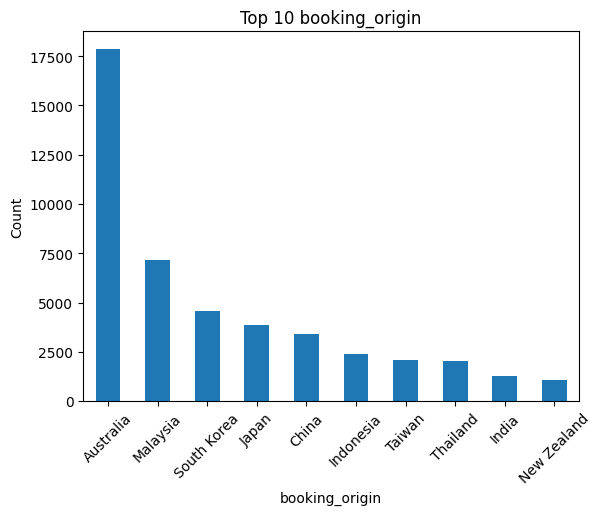

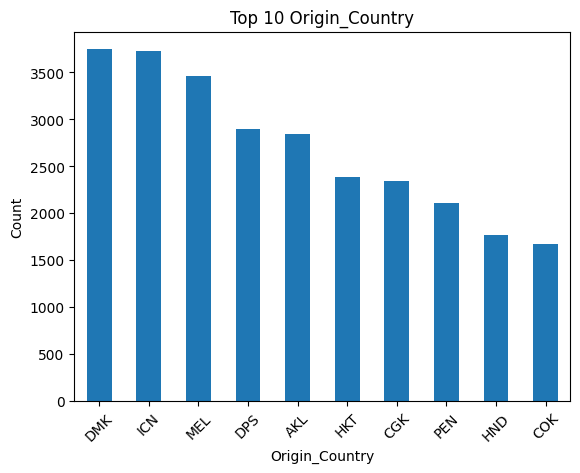

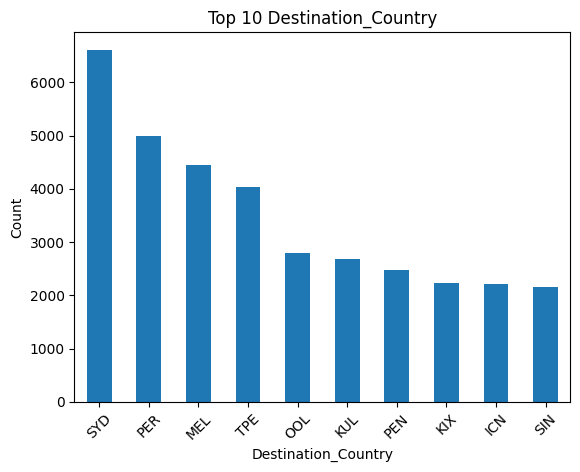

In [94]:
categorical_feature(df,['booking_origin','Origin_Country','Destination_Country'])

In [107]:
df_correlation=df[['booking_complete','num_passengers', 'purchase_lead', 'length_of_stay', 
                    'flight_hour', 'flight_duration','wants_extra_baggage','wants_in_flight_meals',
                   'wants_preferred_seat']]

Text(0.5, 1.0, 'Correlation')

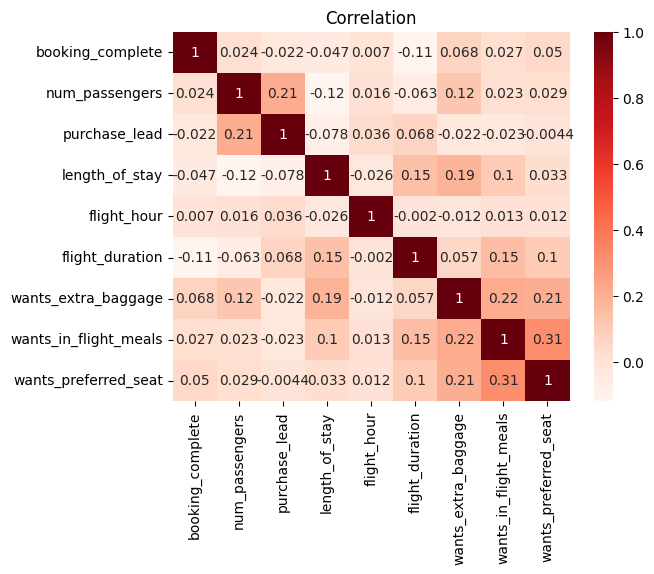

In [111]:
sns.heatmap(df_correlation.corr(),annot=True,cmap='Reds')
plt.title('Correlation')

In [113]:
df_1=df.drop(['trip_type','flight_hour','sales_channel','Day Timing','route'],axis='columns')
df_1.head()

,num_passengers,purchase_lead,length_of_stay,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Origin_Country,Destination_Country
0,2,262,19,6,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,112,20,6,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,243,22,3,India,1,1,0,5.52,0,AKL,DEL
3,1,96,31,6,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,68,22,3,India,1,0,1,5.52,0,AKL,DEL


In [117]:
def conversion(df,feature_list):
    for feature in feature_list:
        top_ten=df[feature].value_counts().head(10).index
        df[feature]=df[feature].apply(lambda x: x if x in top_ten else 'other')
    return df

In [123]:
df_2=conversion(df_1,['booking_origin','Origin_Country','Destination_Country'])

In [125]:
df_2=pd.get_dummies(data=df_2,drop_first=True)
df_2=df_2.astype(int)

In [130]:
df_2.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration',
       'flight_day_2', 'flight_day_3', 'flight_day_4', 'flight_day_5',
       'flight_day_6', 'flight_day_7', 'booking_origin_China',
       'booking_origin_India', 'booking_origin_Indonesia',
       'booking_origin_Japan', 'booking_origin_Malaysia',
       'booking_origin_South Korea', 'booking_origin_Taiwan',
       'booking_origin_Thailand', 'booking_origin_other',
       'wants_extra_baggage_1', 'wants_preferred_seat_1',
       'wants_in_flight_meals_1', 'booking_complete_1', 'Origin_Country_CGK',
       'Origin_Country_DMK', 'Origin_Country_DPS', 'Origin_Country_HKT',
       'Origin_Country_HND', 'Origin_Country_ICN', 'Origin_Country_MEL',
       'Origin_Country_PEN', 'Origin_Country_other', 'Destination_Country_KIX',
       'Destination_Country_KUL', 'Destination_Country_MEL',
       'Destination_Country_OOL', 'Destination_Country_PEN',
       'Destination_Country_PER', 'Destination_Country_SYD',
     

In [131]:
x=df_2.drop(['booking_complete_1'],axis='columns')
y=df_2['booking_complete_1']

# Train The Model

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=0,test_size=0.2)

In [186]:
preprocessor = ColumnTransformer(
   transformers=[
       ('num', StandardScaler(), x.columns),
   ])

In [187]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(n_estimators=100,class_weight='balanced'))
])

In [188]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print(f'The accuracy of this model is :{accuracy_score(y_test,y_pred)}\n')
print(f'The Classification report of this model is :\n{classification_report(y_test,y_pred)}')

The accuracy of this model is :0.8450225112556278

The Classification report of this model is :
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8501
           1       0.44      0.14      0.21      1494

    accuracy                           0.85      9995
   macro avg       0.65      0.55      0.56      9995
weighted avg       0.80      0.85      0.81      9995



Text(0.5, 1.0, 'Confusion Matrix')

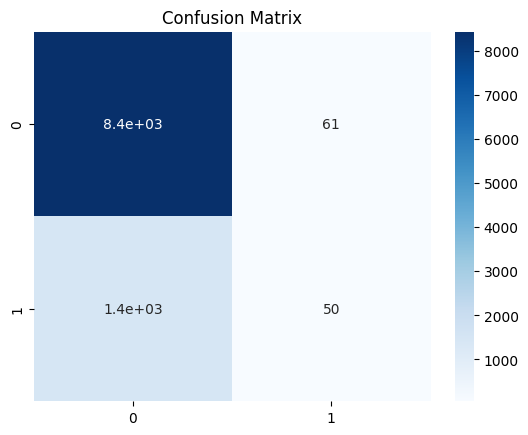

In [204]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(data=con,annot=True,cmap='Blues')
plt.title('Confusion Matrix')

# **Cross Validation**

In [197]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion' : ["gini", "entropy"]
}

RF= RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

C:\Users\Qadri Laptop\PycharmProjects\numpy\venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [201]:
y_pred=grid_search.predict(x_test)
print(f"Best Hyperparameter accuracy is :{grid_search.best_score_}\n")
print(f"Classification report of hperparameter is :\n\n{classification_report(y_test,y_pred)}\n\n")
print(f"Confusion matrix is :\n{confusion_matrix(y_test,y_pred)}")

Best Hyperparameter accuracy is :0.8523864308639624

Classification report of hperparameter is :

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8501
           1       0.45      0.03      0.06      1494

    accuracy                           0.85      9995
   macro avg       0.65      0.51      0.49      9995
weighted avg       0.79      0.85      0.79      9995



Confusion matrix is :
[[8440   61]
 [1444   50]]


# Top Features Using Training

In [202]:
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()
importances = pipe.named_steps['model'].feature_importances_
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
1,num__purchase_lead,0.244491
2,num__length_of_stay,0.174109
0,num__num_passengers,0.063744
14,num__booking_origin_Malaysia,0.055183
3,num__flight_duration,0.045565
21,num__wants_in_flight_meals_1,0.030880
20,num__wants_preferred_seat_1,0.027069
19,num__wants_extra_baggage_1,0.024222
5,num__flight_day_3,0.021323
4,num__flight_day_2,0.020665
